In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv("C:\\Users\\USER\\Downloads\\archive\\vgsales.csv")
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.describe()
df = df.dropna()
df = df.sort_values(by='Year')
df['Year'] = df['Year'].ffill()
df["Year"] = pd.to_datetime(df["Year"],format="%Y").dt.year

In [4]:
df.columns
df.dtypes
df.sort_values(by=["Global_Sales"],ascending=False).head()
df.set_index("Rank",inplace= True)
df.sort_values(by=["Rank"],inplace=True)

In [5]:
df.fillna({"NA_Sales":df["NA_Sales"].mean(),"Year":df["Year"].ffill},inplace=True)
sns.set(rc={'axes.facecolor': 'lightgray', 'figure.facecolor': 'ivory', 'axes.grid': True})

                          Name  Global_Sales
Rank                                        
1                   Wii Sports         82.74
2            Super Mario Bros.         40.24
3               Mario Kart Wii         35.82
4            Wii Sports Resort         33.00
5     Pokemon Red/Pokemon Blue         31.37


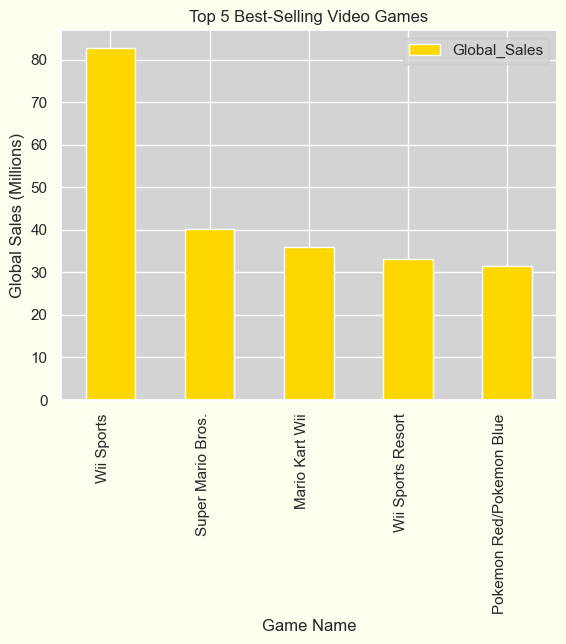

In [6]:
top_5_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(5)
print(top_5_games)
top_5_games.plot(x='Name', y='Global_Sales', kind='bar', color='gold')
plt.title('Top 5 Best-Selling Video Games')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

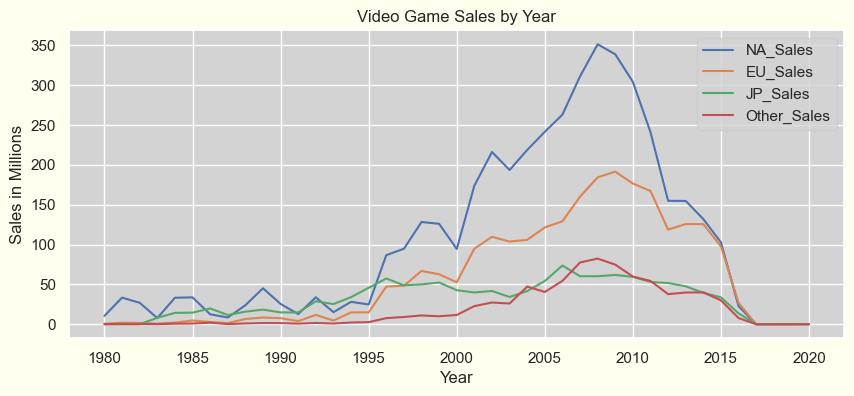

In [7]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
yearly_sales = df.groupby('Year')[sales_columns].sum()
yearly_sales.plot(kind='line', figsize=(10,4))
plt.title('Video Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales in Millions')
plt.legend(sales_columns)
plt.grid(True)
plt.show()

Genre
Action          1721.82
Adventure        234.36
Fighting         444.08
Misc             789.28
Platform         828.80
Puzzle           241.68
Racing           726.53
Role-Playing     923.74
Shooter         1025.69
Simulation       389.70
Sports          1308.84
Strategy         173.00
dtype: float64


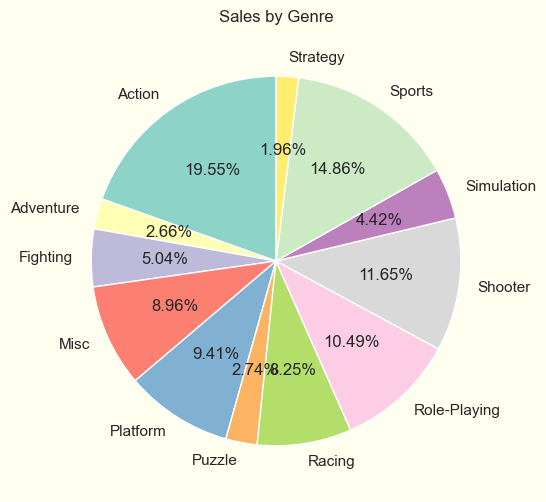

In [8]:
genre_sales = df.groupby('Genre')[sales_columns].sum()
genre_sales_total = genre_sales.sum(axis=1)
print(genre_sales_total)
genre_sales_total.plot(kind='pie', figsize=(10, 6), autopct='%1.2f%%', startangle=90, cmap='Set3')
plt.title('Sales by Genre')
plt.ylabel('')
plt.show()

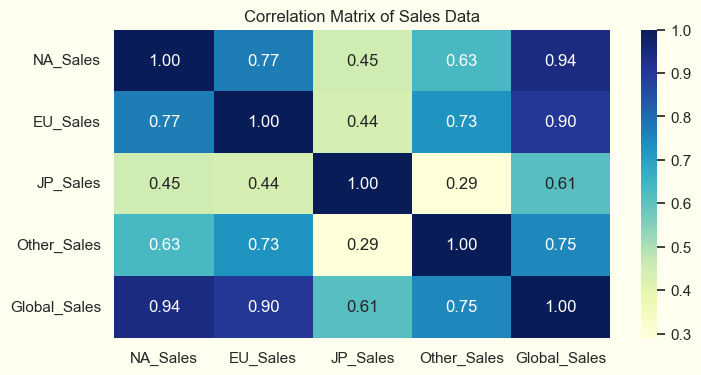

In [9]:
corr = df[sales_columns + ['Global_Sales']].corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of Sales Data')
plt.show()

In [10]:
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].values 
y = df['Global_Sales'].values  

X = np.hstack((np.ones((X.shape[0], 1)), X))

# theta = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

y_pred = X.dot(theta)

mse = np.mean((y - y_pred) ** 2)
r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", theta[1:]) 
print("Model Intercept:", theta[0]) 

Mean Squared Error: 0.01646886292106785
R-squared: 0.9932955780105795
Model Coefficients: [1.04699094 1.22256132 0.9623084 ]
Model Intercept: 0.006308376402600828


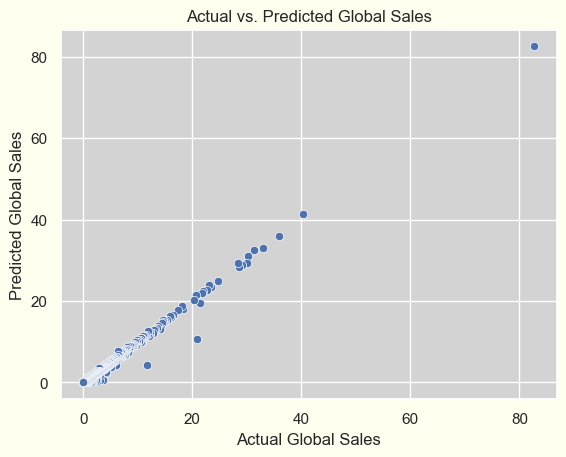

In [11]:
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs. Predicted Global Sales")
plt.show()